In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv('Mall_data.csv') 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(df.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [4]:
# ploting age frequency of customers.

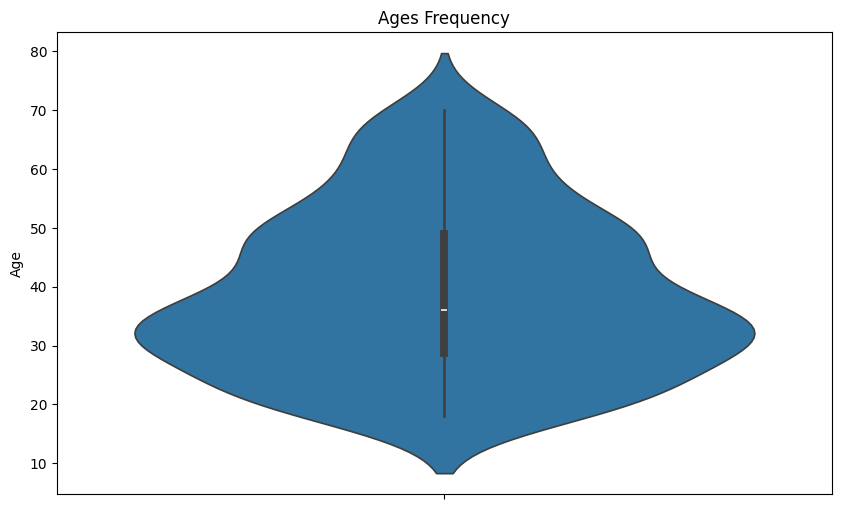

In [5]:
plt.figure(figsize=(10,6)) 
plt.title("Ages Frequency") 
sns.axes_style("dark") 
sns.violinplot(y=df["Age"]) 
plt.show()

In [6]:
# ploting a box of spending score and annual income to better visualize the distribution range. 
# The range of spending score is clearly more than the annual income range.

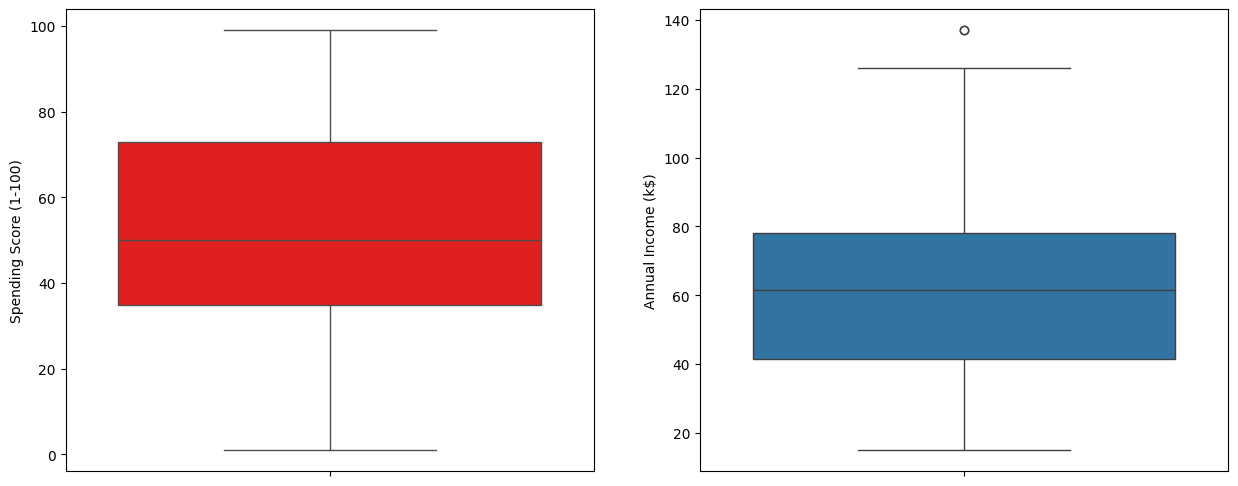

In [7]:
plt.figure(figsize=(15,6)) 
plt.subplot(1,2,1) 
sns.boxplot(y=df["Spending Score (1-100)"], color="red") 
plt.subplot(1,2,2) 
sns.boxplot(y=df["Annual Income (k$)"]) 
plt.show()

In [8]:
# ploting bar to check the distribution of male and female population in the dataset. 
# The female population clearly outweighs the male counterpart.

C:\Users\shwet\AppData\Local\Temp\ipykernel_11784\2696017628.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genders_df, x='Gender', y='Count', palette=colors)


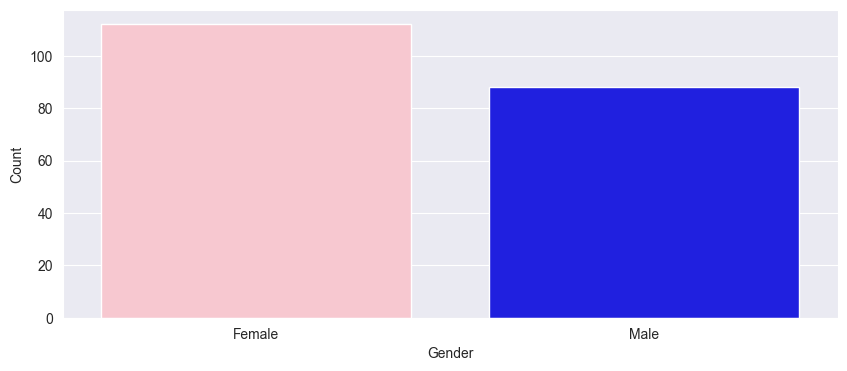

In [9]:
genders = df['Gender'].value_counts()

# Include the 'Gender' column in the DataFrame
genders_df = pd.DataFrame({'Gender': genders.index, 'Count': genders.values})

sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))

# Specify a custom color palette with distinct colors for each gender
colors = {'Male': 'blue', 'Female': 'pink'}
sns.barplot(data=genders_df, x='Gender', y='Count', palette=colors)

plt.show()


In [10]:
# Bar plot to check the distribution of number of customers in each age group. 
# Clearly the 26–35 age group outweighs every other age group.

C:\Users\shwet\AppData\Local\Temp\ipykernel_11784\270239900.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="rocket")


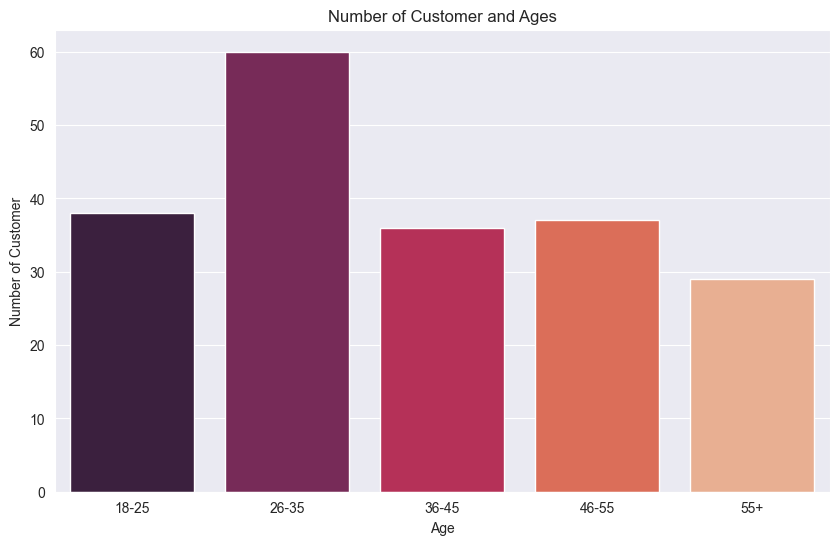

In [11]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)] 
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)] 
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)] 
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)] 
age55above = df.Age[df.Age >= 56] 

x = ["18-25","26-35","36-45","46-55","55+"] 
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)] 

plt.figure(figsize=(10,6)) 
sns.barplot(x=x, y=y, palette="rocket") 

plt.title("Number of Customer and Ages") 
plt.xlabel("Age") 
plt.ylabel("Number of Customer") 

plt.show()

In [12]:
# Bar plot to visualize the number of customers according to their spending scores. 
# The majority of the customers have spending score in the range 41–60.

C:\Users\shwet\AppData\Local\Temp\ipykernel_11784\1022498378.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")


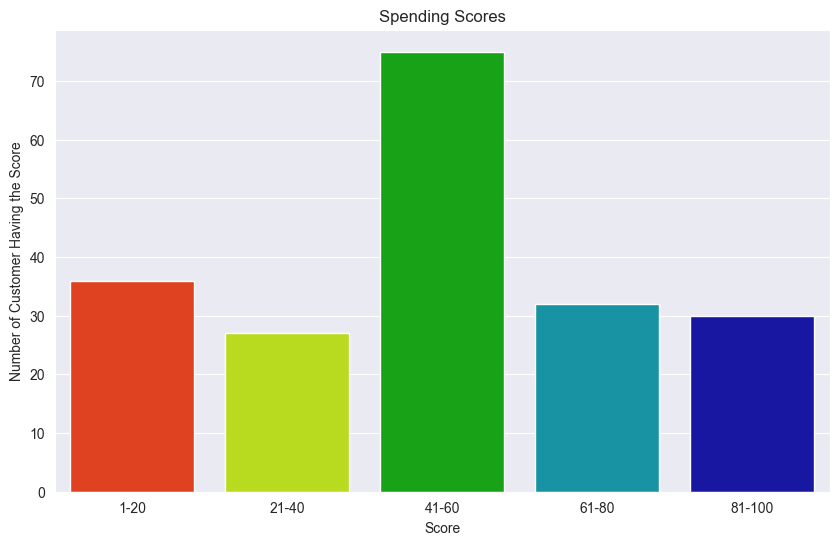

In [13]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)] 
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)] 
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)] 
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)] 
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)] 
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"] 
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)] 

plt.figure(figsize=(10,6)) 
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r") 
plt.title("Spending Scores") 

plt.xlabel("Score") 
plt.ylabel("Number of Customer Having the Score") 

plt.show()

In [14]:
# Next plotted Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. 
# Then Calculated the Within Cluster Sum of Squared Errors (WSS) for different values of k, and chose the k for which WSS first starts to diminish. 
# In the plot of WSS-versus k, this is visible as an elbow.

In [15]:
from sklearn.cluster import KMeans 

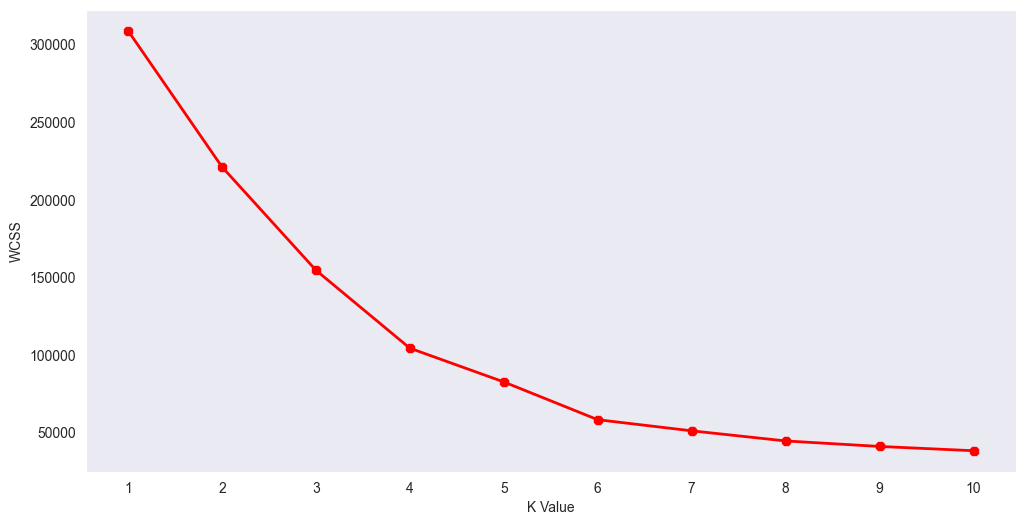

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert 'Gender' column to numerical values
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Convert any remaining non-numeric columns to numerical values (if applicable)
# For example:
# df['Other_Column'] = label_encoder.fit_transform(df['Other_Column'])

# Now, you can proceed with fitting the KMeans algorithm
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df.iloc[:, 1:])  # Assuming 'Gender' is the first column
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('K Value')
plt.xticks(np.arange(1, 11, 1))
plt.ylabel('WCSS')
plt.show()


In [17]:
# The optimal K value is found to be 5 using the elbow method.